In [1]:
#importing the necessary libraries

import pandas as pd
import gc
import math
import PIL 
import numpy as np
import  matplotlib.pyplot as plt
import seaborn 
import datetime
import warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
#Reading/extracting the .csv file (dataset)

df = pd.read_csv('H2HBABBA1263.csv')


In [4]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200776463,KROGE llc,2019-04-15 00:00:00,2019.0,1.929052e+09,2019-03-29,20190329,20190329,20190413.0,USD,RV,1.0,NaN,10079.00,20190329.0,NAA8,1.929052e+09,0
1,U001,0200020431,DEC corp,2019-11-18 00:00:00,2019.0,1.930123e+09,2019-11-07,20191107,20191107,20191124.0,USD,RV,1.0,NaN,14986.34,20191101.0,NAM4,1.930123e+09,0
2,U001,200769623,WAL-MAR in,2019-07-25 00:00:00,2019.0,1.929619e+09,2019-07-15,20190714,20190715,20190730.0,USD,RV,1.0,NaN,3795.70,20190715.0,NAH4,1.929619e+09,0
3,U001,0200726979,BJ'S trust,2019-03-28 00:00:00,2019.0,1.928949e+09,2019-03-12,20190312,20190312,20190327.0,USD,RV,1.0,NaN,99.06,20190312.0,NAA8,1.928949e+09,0
4,CA02,0140106249,FINDLAY systems,2019-10-02 00:00:00,2019.0,2.960576e+09,2019-09-17,20190917,20190917,20190929.0,CAD,RV,1.0,NaN,5056.80,20190919.0,CA10,2.960576e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200769623,WAL-MAR corporation,NaN,2020.0,1.930879e+09,2020-05-09,20200508,20200509,20200524.0,USD,RV,1.0,NaN,3482.23,20200509.0,NAH4,1.930879e+09,1
49996,U001,0200706844,WINC llc,2020-01-21 00:00:00,2020.0,1.930349e+09,2020-01-03,20200103,20200103,20200118.0,USD,RV,1.0,NaN,7959.11,20200103.0,NAA8,1.930349e+09,0
49997,U001,0200793568,SUPE associates,2019-05-15 00:00:00,2019.0,1.929212e+09,2019-04-26,20190426,20190426,20190511.0,USD,RV,1.0,NaN,48935.56,20190426.0,NAA8,1.929212e+09,0
49998,CA02,0140105686,SYSC foundation,2019-05-09 00:00:00,2019.0,2.960543e+09,2019-04-16,20190416,20190416,20190504.0,CAD,RV,1.0,NaN,6374.47,20190424.0,CA10,2.960543e+09,0


In [5]:

#Creating dataframe = rows where clear_date=null  

train=df[df.clear_date.isnull()==False]

# here, created dataframe=rows where clear_date=null

test_clrdtnull=df[df.clear_date.isnull()==True] 


In [6]:
#Viewing training dataframe
train 

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200776463,KROGE llc,2019-04-15 00:00:00,2019.0,1.929052e+09,2019-03-29,20190329,20190329,20190413.0,USD,RV,1.0,NaN,10079.00,20190329.0,NAA8,1.929052e+09,0
1,U001,0200020431,DEC corp,2019-11-18 00:00:00,2019.0,1.930123e+09,2019-11-07,20191107,20191107,20191124.0,USD,RV,1.0,NaN,14986.34,20191101.0,NAM4,1.930123e+09,0
2,U001,200769623,WAL-MAR in,2019-07-25 00:00:00,2019.0,1.929619e+09,2019-07-15,20190714,20190715,20190730.0,USD,RV,1.0,NaN,3795.70,20190715.0,NAH4,1.929619e+09,0
3,U001,0200726979,BJ'S trust,2019-03-28 00:00:00,2019.0,1.928949e+09,2019-03-12,20190312,20190312,20190327.0,USD,RV,1.0,NaN,99.06,20190312.0,NAA8,1.928949e+09,0
4,CA02,0140106249,FINDLAY systems,2019-10-02 00:00:00,2019.0,2.960576e+09,2019-09-17,20190917,20190917,20190929.0,CAD,RV,1.0,NaN,5056.80,20190919.0,CA10,2.960576e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200721222,GO us,2019-11-04 00:00:00,2019.0,1.930035e+09,2019-10-20,20191019,20191020,20191104.0,USD,RV,1.0,NaN,109919.77,20191020.0,NAA8,1.930035e+09,0
49996,U001,0200706844,WINC llc,2020-01-21 00:00:00,2020.0,1.930349e+09,2020-01-03,20200103,20200103,20200118.0,USD,RV,1.0,NaN,7959.11,20200103.0,NAA8,1.930349e+09,0
49997,U001,0200793568,SUPE associates,2019-05-15 00:00:00,2019.0,1.929212e+09,2019-04-26,20190426,20190426,20190511.0,USD,RV,1.0,NaN,48935.56,20190426.0,NAA8,1.929212e+09,0
49998,CA02,0140105686,SYSC foundation,2019-05-09 00:00:00,2019.0,2.960543e+09,2019-04-16,20190416,20190416,20190504.0,CAD,RV,1.0,NaN,6374.47,20190424.0,CA10,2.960543e+09,0


In [7]:
#the 'ultimate' test dataset
test_clrdtnull  

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
12,U001,0200712105,WALG systems,NaN,2020.0,1.930663e+09,2020-03-18,20200317,20200318,20200402.0,USD,RV,1.0,NaN,1409.98,20200318.0,NAA8,1.930663e+09,1
16,U001,0200337148,COAS corp,NaN,2020.0,1.930892e+09,2020-05-11,20200512,20200511,20200526.0,USD,RV,1.0,NaN,73599.48,20200511.0,NAA8,1.930892e+09,1
18,U001,0200820380,SMITH'S co,NaN,2020.0,1.930784e+09,2020-04-16,20200415,20200416,20200501.0,USD,RV,1.0,NaN,53327.28,20200416.0,NAA8,1.930784e+09,1
20,U001,0200769623,WAL-MAR us,NaN,2020.0,1.930684e+09,2020-03-23,20200321,20200323,20200407.0,USD,RV,1.0,NaN,9252.23,20200323.0,NAH4,1.930684e+09,1
23,CA02,0140104229,A & W F associates,NaN,2020.0,2.960630e+09,2020-04-20,20200420,20200420,20200501.0,CAD,RV,1.0,NaN,6150.60,20200421.0,CA10,2.960630e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49970,U001,0200769623,WAL-MAR corp,NaN,2020.0,1.930805e+09,2020-04-22,20200420,20200422,20200507.0,USD,RV,1.0,NaN,5194.49,20200422.0,NAH4,1.930805e+09,1
49983,CA02,0140105785,SHOPPE corporation,NaN,2020.0,2.960620e+09,2020-03-10,20200310,20200310,20200328.0,CAD,RV,1.0,NaN,16089.60,20200318.0,CA10,2.960620e+09,1
49984,U001,0200769623,WAL-MAR llc,NaN,2020.0,1.930772e+09,2020-04-10,20200409,20200410,20200425.0,USD,RV,1.0,NaN,15817.04,20200410.0,NAH4,1.930772e+09,1
49992,U001,0200704858,WAKE,NaN,2020.0,1.930739e+09,2020-04-03,20200403,20200403,20200418.0,USD,RV,1.0,NaN,8977.87,20200403.0,NAA8,1.930739e+09,1


In [8]:
#finding out datatypes of our training dataset
train.dtypes 

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

# PREPROCESSING


### - Date time conversion

In [9]:
#dtype conversion for dates

train['clear_date']=pd.to_datetime(train['clear_date'])

train['posting_date'] = pd.to_datetime(train['posting_date'])



In [10]:
train['document_create_date'] = pd.to_datetime(train['document_create_date'].astype(int).astype(str))

train['document_create_date.1'] = pd.to_datetime(train['document_create_date.1'].astype(int).astype(str))

train['baseline_create_date'] = pd.to_datetime(train['baseline_create_date'].astype(int).astype(str))

train['due_in_date'] = pd.to_datetime(train['due_in_date'].astype(int).astype(str))

### - Null imputation

In [11]:
train.isnull().sum() #finding out columns having null values

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             40000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64

In [12]:

#dropping null column (all are null values or has as 'constat' value )
train=train.drop(['area_business'],axis=1)


In [13]:

train=train[train.invoice_id.isnull()==False] #dropping rows having invoice_id=null 
train.shape


(39994, 18)

### - Removing duplicate and constant columns

In [674]:
train.nunique() #finding out columns having constant values

business_code                 5
cust_number                1367
name_customer              3911
clear_date                  391
buisness_year                 2
doc_id                    39147
posting_date                423
document_create_date        428
document_create_date.1      423
due_in_date                 487
invoice_currency              2
document type                 1
posting_id                    1
total_open_amount         35627
baseline_create_date        432
cust_payment_terms           71
invoice_id                39147
isOpen                        1
dtype: int64

In [14]:
#dropping constant columns accordingly
#dropping buisness_year because its Quasi constant
train=train.drop(['isOpen', 'posting_id','document type','buisness_year'],axis=1) 


In [676]:
train.T.duplicated() #finding out duplicated columns

business_code             False
cust_number               False
name_customer             False
clear_date                False
doc_id                    False
posting_date              False
document_create_date      False
document_create_date.1     True
due_in_date               False
invoice_currency          False
total_open_amount         False
baseline_create_date      False
cust_payment_terms        False
invoice_id                 True
dtype: bool

In [15]:
#dropping the duplicated columns accordingly
#dropping doc_id since its an id column
train=train.drop(['document_create_date.1','invoice_id','doc_id'],axis=1) 


In [16]:
train.head() #training dataframe after constant/duplicate columns removal

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200776463,KROGE llc,2019-04-15,2019-03-29,2019-03-29,2019-04-13,USD,10079.00,2019-03-29,NAA8
1,U001,0200020431,DEC corp,2019-11-18,2019-11-07,2019-11-07,2019-11-24,USD,14986.34,2019-11-01,NAM4
2,U001,200769623,WAL-MAR in,2019-07-25,2019-07-15,2019-07-14,2019-07-30,USD,3795.70,2019-07-15,NAH4
3,U001,0200726979,BJ'S trust,2019-03-28,2019-03-12,2019-03-12,2019-03-27,USD,99.06,2019-03-12,NAA8
4,CA02,0140106249,FINDLAY systems,2019-10-02,2019-09-17,2019-09-17,2019-09-29,CAD,5056.80,2019-09-19,CA10


In [17]:
train.nunique() #finally all the columns have unique values

business_code               5
cust_number              1367
name_customer            3911
clear_date                391
posting_date              423
document_create_date      428
due_in_date               487
invoice_currency            2
total_open_amount       35627
baseline_create_date      432
cust_payment_terms         71
dtype: int64

In [18]:
#Sorting by [posting_date]

train=train.sort_values(by=['posting_date'])

In [19]:
# Finding and adding the target value to train dataframe

train['delay']=(train['clear_date']-train['due_in_date']).dt.days

In [20]:
train.delay

35586    -5
3226     -5
13486     0
27622    -5
17669    -5
         ..
19037     0
44049     4
13254    -2
4799     11
13784     0
Name: delay, Length: 39994, dtype: int64

In [21]:
train['delay'].describe()

count    39994.000000
mean         0.915037
std         10.883205
min        -98.000000
25%         -3.000000
50%          0.000000
75%          2.000000
max        300.000000
Name: delay, dtype: float64

# SPLITTING TRAIN DATA

In [22]:
#Importing required library to split and then splitting it 

from sklearn.model_selection import train_test_split

# Removing target value from the train data
X=train.drop(['delay'],axis=1)

#Now y has the target value 
y=train['delay']


In [33]:
from sklearn.model_selection import train_test_split

X_train,X_temptest,y_train,y_temptest = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)

In [34]:
X_val,X_test,y_val,y_test = train_test_split(X_temptest,y_temptest,test_size=0.5,random_state=0 , shuffle = False)

In [35]:
X_train.shape,X_val.shape,X_test.shape

((27995, 11), (5999, 11), (6000, 11))

In [36]:
X_train

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
35586,U001,0200769623,WAL-MAR in,2019-01-09,2018-12-30,2018-12-29,2019-01-14,USD,21171.35,2018-12-30,NAH4
3226,U001,0200769623,WAL-MAR corporation,2019-01-09,2018-12-30,2018-12-30,2019-01-14,USD,15274.46,2018-12-30,NAH4
13486,U001,0200769623,WAL-MAR associates,2019-01-14,2018-12-30,2018-12-29,2019-01-14,USD,10228.36,2018-12-30,NAH4
27622,U001,0200769623,WAL-MAR us,2019-01-09,2018-12-30,2018-12-29,2019-01-14,USD,15802.32,2018-12-30,NAH4
17669,U001,0200769623,WAL-MAR associates,2019-01-09,2018-12-30,2018-12-30,2019-01-14,USD,38289.77,2018-12-30,NAH4
...,...,...,...,...,...,...,...,...,...,...,...
9519,U001,0200769623,WAL-MAR corporation,2019-10-21,2019-10-10,2019-10-08,2019-10-25,USD,30051.43,2019-10-10,NAH4
34665,CA02,0140105686,SYSC trust,2019-10-24,2019-10-10,2019-10-10,2019-10-21,CAD,81591.60,2019-10-11,CA10
44353,U001,0200724999,GILSTE co,2019-10-26,2019-10-10,2019-10-15,2019-10-20,USD,20731.68,2019-10-10,NA10
25384,U001,CCU013,KRAFT F systems,2019-11-27,2019-10-10,2019-10-11,2019-10-10,USD,5938.23,2019-10-10,NAX2


In [37]:
y

35586    -5
3226     -5
13486     0
27622    -5
17669    -5
         ..
19037     0
44049     4
13254    -2
4799     11
13784     0
Name: delay, Length: 39994, dtype: int64

# EDA

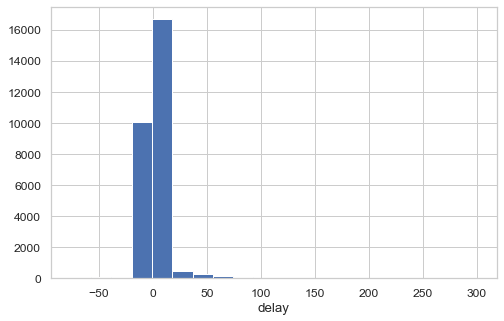

In [38]:
# Distribution of the target column ; right skewd distribution
# Negligible amount of outliers present hence not removing them wont affect

import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

sns.distplot( y_train, norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1});

In [39]:
#Concatenating the X_train and y_train 

X_chk=pd.concat([X_train,y_train],axis=1)

X_chk

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay
35586,U001,0200769623,WAL-MAR in,2019-01-09,2018-12-30,2018-12-29,2019-01-14,USD,21171.35,2018-12-30,NAH4,-5
3226,U001,0200769623,WAL-MAR corporation,2019-01-09,2018-12-30,2018-12-30,2019-01-14,USD,15274.46,2018-12-30,NAH4,-5
13486,U001,0200769623,WAL-MAR associates,2019-01-14,2018-12-30,2018-12-29,2019-01-14,USD,10228.36,2018-12-30,NAH4,0
27622,U001,0200769623,WAL-MAR us,2019-01-09,2018-12-30,2018-12-29,2019-01-14,USD,15802.32,2018-12-30,NAH4,-5
17669,U001,0200769623,WAL-MAR associates,2019-01-09,2018-12-30,2018-12-30,2019-01-14,USD,38289.77,2018-12-30,NAH4,-5
...,...,...,...,...,...,...,...,...,...,...,...,...
9519,U001,0200769623,WAL-MAR corporation,2019-10-21,2019-10-10,2019-10-08,2019-10-25,USD,30051.43,2019-10-10,NAH4,-4
34665,CA02,0140105686,SYSC trust,2019-10-24,2019-10-10,2019-10-10,2019-10-21,CAD,81591.60,2019-10-11,CA10,3
44353,U001,0200724999,GILSTE co,2019-10-26,2019-10-10,2019-10-15,2019-10-20,USD,20731.68,2019-10-10,NA10,6
25384,U001,CCU013,KRAFT F systems,2019-11-27,2019-10-10,2019-10-11,2019-10-10,USD,5938.23,2019-10-10,NAX2,48


<AxesSubplot:xlabel='delay', ylabel='total_open_amount'>

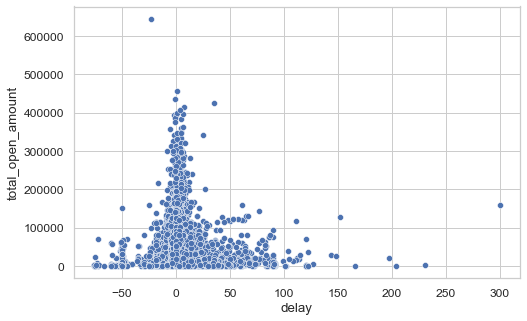

In [40]:
#No direct trend found

sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="delay", y="total_open_amount")

# FEATURE ENGINEERING

In [41]:
X_train.head()

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
35586,U001,0200769623,WAL-MAR in,2019-01-09,2018-12-30,2018-12-29,2019-01-14,USD,21171.35,2018-12-30,NAH4
3226,U001,0200769623,WAL-MAR corporation,2019-01-09,2018-12-30,2018-12-30,2019-01-14,USD,15274.46,2018-12-30,NAH4
13486,U001,0200769623,WAL-MAR associates,2019-01-14,2018-12-30,2018-12-29,2019-01-14,USD,10228.36,2018-12-30,NAH4
27622,U001,0200769623,WAL-MAR us,2019-01-09,2018-12-30,2018-12-29,2019-01-14,USD,15802.32,2018-12-30,NAH4
17669,U001,0200769623,WAL-MAR associates,2019-01-09,2018-12-30,2018-12-30,2019-01-14,USD,38289.77,2018-12-30,NAH4


In [42]:
#Checking out present X_train

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27995 entries, 35586 to 22297
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         27995 non-null  object        
 1   cust_number           27995 non-null  object        
 2   name_customer         27995 non-null  object        
 3   clear_date            27995 non-null  datetime64[ns]
 4   posting_date          27995 non-null  datetime64[ns]
 5   document_create_date  27995 non-null  datetime64[ns]
 6   due_in_date           27995 non-null  datetime64[ns]
 7   invoice_currency      27995 non-null  object        
 8   total_open_amount     27995 non-null  float64       
 9   baseline_create_date  27995 non-null  datetime64[ns]
 10  cust_payment_terms    27995 non-null  object        
dtypes: datetime64[ns](5), float64(1), object(5)
memory usage: 2.6+ MB


### - Encoding categorical features

In [43]:
#Encoding categorical features of X_train

from sklearn import preprocessing

ec = preprocessing.LabelEncoder()

X_train['business_code']= ec.fit_transform(X_train['business_code'])

X_train['cust_number']= ec.fit_transform(X_train['cust_number'])

X_train['cust_payment_terms']= ec.fit_transform(X_train['cust_payment_terms'])

X_train['name_customer']= ec.fit_transform(X_train['name_customer'])

X_train['invoice_currency']= ec.fit_transform(X_train['invoice_currency'])


In [44]:
#Encoding categorical features of X_train

X_val['business_code']= ec.fit_transform(X_val['business_code'])

X_val['cust_number']= ec.fit_transform(X_val['cust_number'])

X_val['cust_payment_terms']= ec.fit_transform(X_val['cust_payment_terms'])

X_val['name_customer']= ec.fit_transform(X_val['name_customer'])

X_val['invoice_currency']= ec.fit_transform(X_val['invoice_currency'])


In [45]:
#Encoding categorical features of X_train

X_test['business_code']= ec.fit_transform(X_test['business_code'])

X_test['cust_number']= ec.fit_transform(X_test['cust_number'])

X_test['cust_payment_terms']= ec.fit_transform(X_test['cust_payment_terms'])

X_test['name_customer']= ec.fit_transform(X_test['name_customer'])

X_test['invoice_currency']= ec.fit_transform(X_test['invoice_currency'])


In [46]:
#X_train after encoding

X_train.head()

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
35586,1,756,3223,2019-01-09,2018-12-30,2018-12-29,2019-01-14,1,21171.35,2018-12-30,30
3226,1,756,3221,2019-01-09,2018-12-30,2018-12-30,2019-01-14,1,15274.46,2018-12-30,30
13486,1,756,3218,2019-01-14,2018-12-30,2018-12-29,2019-01-14,1,10228.36,2018-12-30,30
27622,1,756,3227,2019-01-09,2018-12-30,2018-12-29,2019-01-14,1,15802.32,2018-12-30,30
17669,1,756,3218,2019-01-09,2018-12-30,2018-12-30,2019-01-14,1,38289.77,2018-12-30,30


In [47]:
#X_test after encoding

X_val.head()

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
26700,1,417,292,2019-10-24,2019-10-10,2019-10-08,2019-10-25,1,1834.12,2019-10-10,14
1612,1,352,215,2019-10-31,2019-10-10,2019-10-09,2019-10-25,1,14732.11,2019-10-10,17
39199,0,128,525,2019-10-28,2019-10-10,2019-10-10,2019-10-28,0,744.45,2019-10-18,4
21300,1,277,1186,2019-10-25,2019-10-10,2019-10-10,2019-10-25,1,13015.25,2019-10-10,12
36339,1,296,150,2019-10-25,2019-10-10,2019-10-10,2019-10-25,1,647.39,2019-10-10,12


In [48]:
#X_test after encoding

X_test.head()

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
32465,1,364,1323,2019-12-27,2019-12-12,2019-12-11,2019-12-27,1,18080.00,2019-12-12,10
30088,1,332,147,2019-12-27,2019-12-12,2019-12-12,2019-12-27,1,808.88,2019-12-12,10
6297,1,497,1094,2019-12-24,2019-12-12,2019-12-10,2019-12-27,1,42451.20,2019-12-12,10
5662,1,401,1427,2019-12-23,2019-12-12,2019-12-10,2019-12-27,1,4583.00,2019-12-12,24
25028,1,401,1427,2019-12-23,2019-12-12,2019-12-12,2019-12-27,1,46700.26,2019-12-12,24


### - Extracting features

In [49]:
# Seperating day,month and year from the dates in X_train

for col1 in ['clear_date','baseline_create_date','due_in_date','document_create_date','due_in_date','posting_date']:
    
    X_train['{}.day'.format(col1)]=X_train[col1].dt.day
    X_train['{}.year'.format(col1)]=X_train[col1].dt.year
    X_train['{}.month'.format(col1)]=X_train[col1].dt.month
    

In [50]:
#droping counterparts

X_train=X_train.drop(['clear_date','baseline_create_date','due_in_date','document_create_date','due_in_date','posting_date'],axis=1)

X_train.head()

,business_code,cust_number,name_customer,invoice_currency,total_open_amount,cust_payment_terms,clear_date.day,clear_date.year,clear_date.month,baseline_create_date.day,...,baseline_create_date.month,due_in_date.day,due_in_date.year,due_in_date.month,document_create_date.day,document_create_date.year,document_create_date.month,posting_date.day,posting_date.year,posting_date.month
35586,1,756,3223,1,21171.35,30,9,2019,1,30,...,12,14,2019,1,29,2018,12,30,2018,12
3226,1,756,3221,1,15274.46,30,9,2019,1,30,...,12,14,2019,1,30,2018,12,30,2018,12
13486,1,756,3218,1,10228.36,30,14,2019,1,30,...,12,14,2019,1,29,2018,12,30,2018,12
27622,1,756,3227,1,15802.32,30,9,2019,1,30,...,12,14,2019,1,29,2018,12,30,2018,12
17669,1,756,3218,1,38289.77,30,9,2019,1,30,...,12,14,2019,1,30,2018,12,30,2018,12


In [51]:
# Seperating day,month and year from the dates in X_val

for col1 in ['clear_date','baseline_create_date','due_in_date','document_create_date','due_in_date','posting_date']:
    
    X_val['{}.day'.format(col1)]=X_val[col1].dt.day
    
    X_val['{}.year'.format(col1)]=X_val[col1].dt.year
    
    X_val['{}.month'.format(col1)]=X_val[col1].dt.month
    

In [52]:
#droping counterparts

X_val=X_val.drop(['clear_date','baseline_create_date','due_in_date','document_create_date','due_in_date','posting_date'],axis=1)

X_val.head()

,business_code,cust_number,name_customer,invoice_currency,total_open_amount,cust_payment_terms,clear_date.day,clear_date.year,clear_date.month,baseline_create_date.day,...,baseline_create_date.month,due_in_date.day,due_in_date.year,due_in_date.month,document_create_date.day,document_create_date.year,document_create_date.month,posting_date.day,posting_date.year,posting_date.month
26700,1,417,292,1,1834.12,14,24,2019,10,10,...,10,25,2019,10,8,2019,10,10,2019,10
1612,1,352,215,1,14732.11,17,31,2019,10,10,...,10,25,2019,10,9,2019,10,10,2019,10
39199,0,128,525,0,744.45,4,28,2019,10,18,...,10,28,2019,10,10,2019,10,10,2019,10
21300,1,277,1186,1,13015.25,12,25,2019,10,10,...,10,25,2019,10,10,2019,10,10,2019,10
36339,1,296,150,1,647.39,12,25,2019,10,10,...,10,25,2019,10,10,2019,10,10,2019,10


In [53]:
# Seperating day,month and year from the dates in X_test

for col1 in ['clear_date','baseline_create_date','due_in_date','document_create_date','due_in_date','posting_date']:
    
    X_test['{}.day'.format(col1)]=X_test[col1].dt.day
    
    X_test['{}.year'.format(col1)]=X_test[col1].dt.year
    
    X_test['{}.month'.format(col1)]=X_test[col1].dt.month
    

In [54]:
#droping counterparts

X_test=X_test.drop(['clear_date','baseline_create_date','due_in_date','document_create_date','due_in_date','posting_date'],axis=1)

X_test.head()

,business_code,cust_number,name_customer,invoice_currency,total_open_amount,cust_payment_terms,clear_date.day,clear_date.year,clear_date.month,baseline_create_date.day,...,baseline_create_date.month,due_in_date.day,due_in_date.year,due_in_date.month,document_create_date.day,document_create_date.year,document_create_date.month,posting_date.day,posting_date.year,posting_date.month
32465,1,364,1323,1,18080.00,10,27,2019,12,12,...,12,27,2019,12,11,2019,12,12,2019,12
30088,1,332,147,1,808.88,10,27,2019,12,12,...,12,27,2019,12,12,2019,12,12,2019,12
6297,1,497,1094,1,42451.20,10,24,2019,12,12,...,12,27,2019,12,10,2019,12,12,2019,12
5662,1,401,1427,1,4583.00,24,23,2019,12,12,...,12,27,2019,12,10,2019,12,12,2019,12
25028,1,401,1427,1,46700.26,24,23,2019,12,12,...,12,27,2019,12,12,2019,12,12,2019,12


# FEATURE SELECTION

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

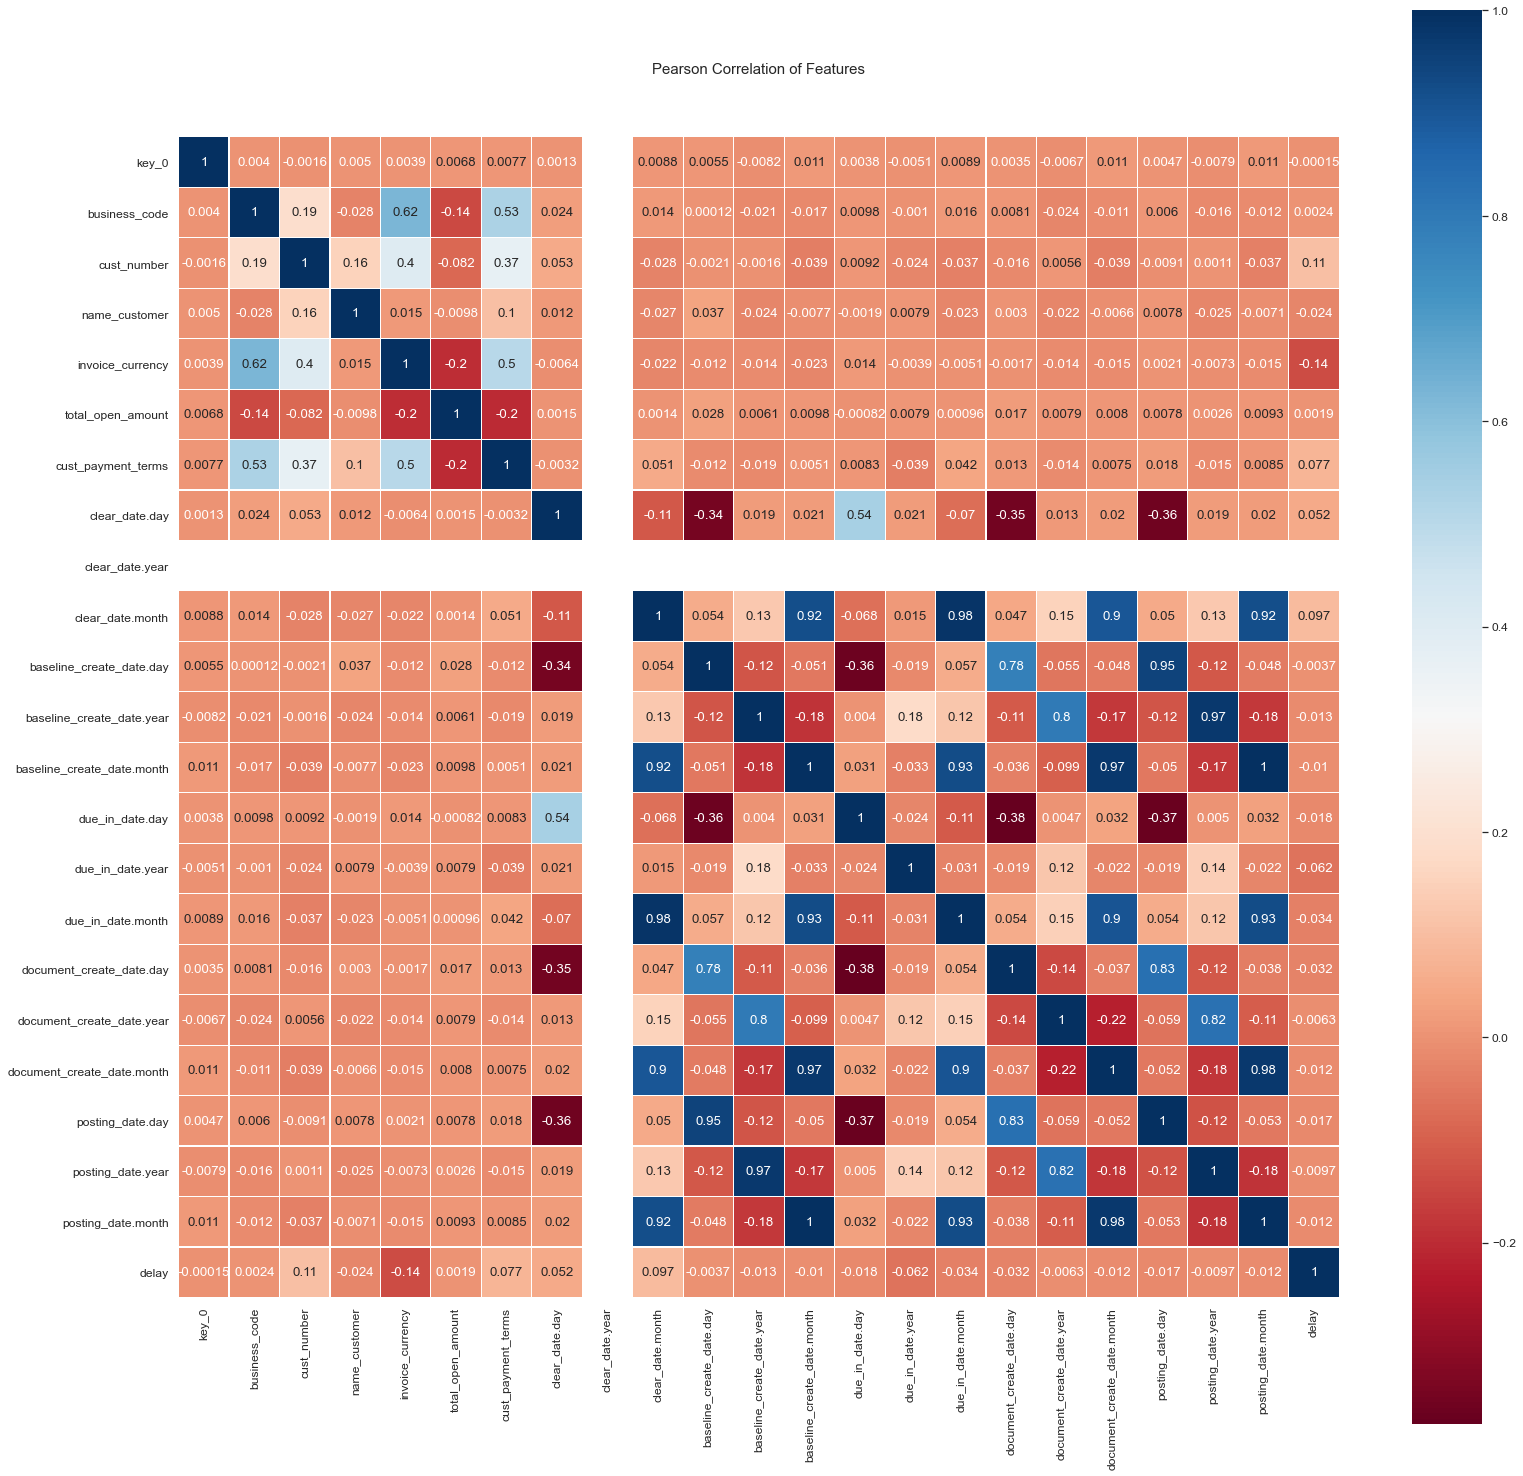

In [707]:
#Generating a heatmap to find the correlation of the features

colormap = plt.cm.RdBu

plt.figure(figsize=(26,26))

plt.title('Pearson Correlation of Features', y=1.05, size=15)

sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [55]:
#Creating function to drop the necessary columns

def drop_col(col ,X_train2 = X_train,X_val2 = X_val,X_test2= X_test):
    
    X_train2.drop(col, axis =1,inplace=True)
    
    X_val2.drop(col,axis=1 , inplace=True)
    
    X_test2.drop(col,axis=1 , inplace=True)

    return X_train2,X_val2,X_test2

###### Here, the features we are going to remove are mostly in high correlation with  'due_in_date_day/month/year or 

###### with''posting_date_day/month/year. 

###### Therefore they are going to be removed.

In [56]:
#Dropping clear_date day,month and year from X_train,X_val and X_test

X_train ,X_val, X_test = drop_col(['clear_date.day'])

X_train ,X_val, X_test = drop_col(['clear_date.month'])

X_train ,X_val, X_test = drop_col(['clear_date.year'])



In [57]:
#Dropping clear_date day,month and year from X_train,X_val and X_test

X_train ,X_val, X_test = drop_col(['baseline_create_date.day'])

X_train ,X_val, X_test = drop_col(['baseline_create_date.month'])

X_train ,X_val, X_test = drop_col(['baseline_create_date.year'])


In [58]:
#Dropping clear_date day,month and year from X_train,X_val and X_test

X_train ,X_val, X_test = drop_col(['document_create_date.day'])

X_train ,X_val, X_test = drop_col(['document_create_date.month'])

X_train ,X_val, X_test = drop_col(['document_create_date.year'])


In [59]:
#Dropping the cust_number.
#Datasets already have name_customer(i.e. customer name) for each entry/record

X_train ,X_val, X_test = drop_col(['cust_number'])


In [60]:
#using Variance Threshold

from sklearn.feature_selection import VarianceThreshold
varr = VarianceThreshold(0.9)

varr.fit(X_train)


VarianceThreshold(threshold=0.9)

In [61]:
varr.variances_

array([2.06661549e-01, 1.23315702e+06, 7.30715105e-02, 1.55302409e+09,
       1.28380832e+02, 7.53412440e+01, 1.78571423e-04, 7.27341374e+00,
       7.74960729e+01, 5.40006107e-03, 7.22430462e+00])

# MODELLING


###### Regression modelling would be used in this case because here a continuous variable i.e. 'delay' is going to be predicted.

In [62]:
#Current status of X_train,X_val and X_test
X_train.shape,X_test.shape,X_val.shape

((27995, 11), (6000, 11), (5999, 11))

In [63]:
# Defining lists to store the results to compare the results later
MSE = []
RMSE= []
Algorithm = []

In [78]:

# Modeling & Accuracy Metrics
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error


In [65]:
X_test.shape,X_val.shape

((6000, 11), (5999, 11))

### - Simple Linear Regression

In [66]:
# Fitting Simple Linear Regression to X_train

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)



LinearRegression()

In [67]:
#Storing the model to be predicted on (X_val) in predict
predict1 = linreg.predict(X_val)

In [68]:
#Getting the mean squared error(MSE)

from sklearn.metrics import mean_squared_error
mse1=mean_squared_error(y_val, predict1)
mse1

45.51153365976316

In [69]:
#Getting the root mean squared error(RMSE)
rmse1=mean_squared_error(y_val, predict1,squared=False)
rmse1

6.746223659186164

In [70]:
#Appending in respective lists

MSE.append(mse1)
RMSE.append(rmse1)
Algorithm.append('Simple Linear Regression')


### - Decision Tree

In [71]:
#Fitting  Decision tree to model

from sklearn.tree import DecisionTreeRegressor

Dregressor = DecisionTreeRegressor()
Dregressor.fit(X_train, y_train)


DecisionTreeRegressor()

In [72]:
predict2 = Dregressor.predict(X_val)
mse2=mean_squared_error(y_val, predict2)
mse2

345.260543423904

In [73]:
rmse2=mean_squared_error(y_val, predict2,squared=False)
rmse2

18.581187890549515

In [74]:
#Appending in respective lists

MSE.append(mse2)
RMSE.append(rmse2)
Algorithm.append('Decision Tree')

### - SVR

In [77]:
# Fitting SVR to the Training Set

SVReg = SVR()
SVReg.fit(X_train, y_train)



SVR()

In [82]:
predict3 = SVReg.predict(X_val)
mse3=mean_squared_error(y_val, predict3)
mse3

43.54636702383295

In [83]:
rmse3=mean_squared_error(y_val, predict3,squared=False)
rmse3

6.598967117953608

In [84]:
#Appending in respective lists

MSE.append(mse3)
RMSE.append(rmse3)
Algorithm.append('SVR')

### -XGB Regressor

In [80]:

XGBReg = xgb.XGBRegressor()
XGBReg.fit(X_train, y_train)

# Predicting the Test Set Results
predict4 = XGBReg.predict(X_val)


In [85]:
mse4=mean_squared_error(y_val, predict4)
mse4

88.5251242342924

In [86]:
rmse4=mean_squared_error(y_val, predict4,squared=False)
rmse4

9.408779104341455

In [87]:
#Appending in respective lists

MSE.append(mse4)
RMSE.append(rmse4)
Algorithm.append('XGB Regressor')

### - Random Forest Regressor

In [81]:
Algorithm.append('Random Forest Regressor')
RandFor = RandomForestRegressor()
RandFor.fit(X_train, y_train)

# Predicting the Test Set Results
predict5 = RandFor.predict(X_test)

In [88]:
predict5 = RandFor.predict(X_val)

In [89]:
mse5=mean_squared_error(y_val, predict5)
mse5

99.98079918319719

In [90]:
rmse5=mean_squared_error(y_val, predict5,squared=False)
rmse5

9.999039913071513

In [91]:
#Appending in respective lists

MSE.append(mse5)
RMSE.append(rmse5)
Algorithm.append('Random Forest Regressor')

### - Comparing

In [92]:
# Combining the lists
compar = pd.DataFrame(list(zip(Algorithm, MSE, RMSE)), columns = ['Algorithm', 'MSE', 'RMSE'])
compar

,Algorithm,MSE,RMSE
0,Simple Linear Regression,45.511534,6.746224
1,Decision Tree,345.260543,18.581188
2,Random Forest Regressor,43.546367,6.598967
3,SVR,88.525124,9.408779
4,XGB Regressor,99.980799,9.999040


###### After comparing it can be seen that SVR  and Random Forest has least RMSE . But its sluggish while fitting in a large dataset. So it has not 

###### been considered  here. The next algorithm having least RMSE is XGB regressor. The XGB Regressor takes a less time comparatively but 

###### still it is taking a bit of time and can be a misfit for a larger dataset .Also its harder to tune as there are too many hyperparameters.So finally 

###### I concluded to go on with Simple Linear Regression and check with Descision Tree as well.


# CHECKING PREDICTION ON X_test

In [93]:
#1)Checking with Simple Linear regression first

X_predict_test1 = linreg.predict(X_test)
mean_squared_error(y_test, X_predict_test1, squared=False)

43.223770395389096

In [94]:
#2)Checking with Decision Tree Regressor

X_predict_test2 = Dregressor.predict(X_test)
mean_squared_error(y_test, X_predict_test2, squared=False)

20.562903491481936

###### So now Decision Tree would be the viable option to proceed with . Before proceeding further , I am going to hypertune it  to get a better result.

In [730]:
                                        #-------------Hypertuning----------------
    
    
    
    
#Importing necessary libraries to find the best hyperparameters

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV



#Looking for best max_depth.
#Here other parameters have not been considered based on situation

params = {'max_depth':list(range(2,10))}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=0), params)

grid_search_cv.fit(X_train, y_train)


GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]})

In [648]:
#Finally getting the best parameter with random_state=0
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=9, random_state=0)

In [95]:
#Fitting with hypertunes parameters
Dregressor = DecisionTreeRegressor(max_depth=9,random_state=0)

In [96]:

Dregressor.fit(X_train, y_train)
predictNew = Dregressor.predict(X_val)


In [97]:
#RMSE
mean_squared_error(y_val, predictNew, squared=False)

9.964281371977114

In [98]:
#Confirming on X_test

X3_predict_test = Dregressor.predict(X_test)
mean_squared_error(y_test, X3_predict_test, squared=False)

17.36232250683561

# WORKING ON FINAL TEST DATASET (where clear_date=null) :


In [99]:
#Storing test_clrdtnull(final dataset dataframe) in a temporary dataframe

temp_testdf=test_clrdtnull



In [100]:
# Rows and columns of final test dataframe = Rows and columns main train dataframe 

temp_testdf.shape


(10000, 19)

In [101]:
# Datatypes of features of final test dataframe = Datatypes of features of train dataframe 

temp_testdf.dtypes


business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

## Now 'temp_testdf' would be brought to the same format as 'X_train' :-

In [102]:
                                    #---------1 PREPROCESSING-------#
    

#Datetime conversion

temp_testdf['clear_date']=pd.to_datetime(temp_testdf['clear_date'])

temp_testdf['posting_date'] = pd.to_datetime(temp_testdf['posting_date'])



In [103]:

temp_testdf['document_create_date'] = pd.to_datetime(temp_testdf['document_create_date'].astype(int).astype(str))

temp_testdf['document_create_date.1'] = pd.to_datetime(temp_testdf['document_create_date.1'].astype(int).astype(str))

temp_testdf['baseline_create_date'] = pd.to_datetime(temp_testdf['baseline_create_date'].astype(int).astype(str))

temp_testdf['due_in_date'] = pd.to_datetime(temp_testdf['due_in_date'].astype(int).astype(str))


In [104]:
#Null Imputation

temp_testdf=temp_testdf.drop(['area_business'],axis=1)

temp_testdf=temp_testdf.drop(['isOpen', 'posting_id','document type','buisness_year'],axis=1)

temp_testdf=temp_testdf.drop(['document_create_date.1','invoice_id','doc_id'],axis=1)


In [105]:
test_clrdtnull.shape

(10000, 19)

In [106]:
                                    #-----FEATURE ENGINEERING-----
    
# Encoding categorical values 

from sklearn import preprocessing

ec = preprocessing.LabelEncoder()

temp_testdf['business_code']= ec.fit_transform(temp_testdf['business_code'])

temp_testdf['cust_number']= ec.fit_transform(temp_testdf['cust_number'])

temp_testdf['cust_payment_terms']= ec.fit_transform(temp_testdf['cust_payment_terms'])

temp_testdf['name_customer']= ec.fit_transform(temp_testdf['name_customer'])

temp_testdf['invoice_currency']= ec.fit_transform(temp_testdf['invoice_currency'])



In [107]:
# Extracting features 


for col1 in ['clear_date','baseline_create_date','due_in_date','document_create_date','due_in_date','posting_date']:
    
    temp_testdf['{}.day'.format(col1)]=temp_testdf[col1].dt.day
    
    temp_testdf['{}.year'.format(col1)]=temp_testdf[col1].dt.year
    
    temp_testdf['{}.month'.format(col1)]=temp_testdf[col1].dt.month
    

#Droping counterparts
temp_testdf=temp_testdf.drop(['clear_date','baseline_create_date','due_in_date','document_create_date','due_in_date','posting_date'],axis=1)


In [108]:
# Current condition/status
temp_testdf.head() 

,business_code,cust_number,name_customer,invoice_currency,total_open_amount,cust_payment_terms,clear_date.day,clear_date.year,clear_date.month,baseline_create_date.day,...,baseline_create_date.month,due_in_date.day,due_in_date.year,due_in_date.month,document_create_date.day,document_create_date.year,document_create_date.month,posting_date.day,posting_date.year,posting_date.month
12,1,286,1650,1,1409.98,12,NaN,NaN,NaN,18,...,3,2,2020,4,17,2020,3,18,2020,3
16,1,204,306,1,73599.48,12,NaN,NaN,NaN,11,...,5,26,2020,5,12,2020,5,11,2020,5
18,1,441,1353,1,53327.28,12,NaN,NaN,NaN,16,...,4,1,2020,5,15,2020,4,16,2020,4
20,1,372,1641,1,9252.23,26,NaN,NaN,NaN,23,...,3,7,2020,4,21,2020,3,23,2020,3
23,0,111,6,0,6150.60,2,NaN,NaN,NaN,21,...,4,1,2020,5,20,2020,4,20,2020,4


In [109]:
                                #---------------FEATURE SELECTION---------------------
    

#Dropping/removing the features removed from X_train as well for same reasons

temp_testdf=temp_testdf.drop(['clear_date.day', 'clear_date.month','clear_date.year'],axis=1)

temp_testdf=temp_testdf.drop(['baseline_create_date.day', 'baseline_create_date.month','baseline_create_date.year'],axis=1)

temp_testdf=temp_testdf.drop(['document_create_date.day', 'document_create_date.month','document_create_date.year'],axis=1)

temp_testdf=temp_testdf.drop(['cust_number'],axis=1)



In [110]:
#After feature selection
test_clrdtnull

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
12,U001,0200712105,WALG systems,NaT,2020.0,1.930663e+09,2020-03-18,2020-03-17,2020-03-18,2020-04-02,USD,RV,1.0,NaN,1409.98,2020-03-18,NAA8,1.930663e+09,1
16,U001,0200337148,COAS corp,NaT,2020.0,1.930892e+09,2020-05-11,2020-05-12,2020-05-11,2020-05-26,USD,RV,1.0,NaN,73599.48,2020-05-11,NAA8,1.930892e+09,1
18,U001,0200820380,SMITH'S co,NaT,2020.0,1.930784e+09,2020-04-16,2020-04-15,2020-04-16,2020-05-01,USD,RV,1.0,NaN,53327.28,2020-04-16,NAA8,1.930784e+09,1
20,U001,0200769623,WAL-MAR us,NaT,2020.0,1.930684e+09,2020-03-23,2020-03-21,2020-03-23,2020-04-07,USD,RV,1.0,NaN,9252.23,2020-03-23,NAH4,1.930684e+09,1
23,CA02,0140104229,A & W F associates,NaT,2020.0,2.960630e+09,2020-04-20,2020-04-20,2020-04-20,2020-05-01,CAD,RV,1.0,NaN,6150.60,2020-04-21,CA10,2.960630e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49970,U001,0200769623,WAL-MAR corp,NaT,2020.0,1.930805e+09,2020-04-22,2020-04-20,2020-04-22,2020-05-07,USD,RV,1.0,NaN,5194.49,2020-04-22,NAH4,1.930805e+09,1
49983,CA02,0140105785,SHOPPE corporation,NaT,2020.0,2.960620e+09,2020-03-10,2020-03-10,2020-03-10,2020-03-28,CAD,RV,1.0,NaN,16089.60,2020-03-18,CA10,2.960620e+09,1
49984,U001,0200769623,WAL-MAR llc,NaT,2020.0,1.930772e+09,2020-04-10,2020-04-09,2020-04-10,2020-04-25,USD,RV,1.0,NaN,15817.04,2020-04-10,NAH4,1.930772e+09,1
49992,U001,0200704858,WAKE,NaT,2020.0,1.930739e+09,2020-04-03,2020-04-03,2020-04-03,2020-04-18,USD,RV,1.0,NaN,8977.87,2020-04-03,NAA8,1.930739e+09,1


In [111]:
                        #-------------------Finding predicted delay--------------

final_p = Dregressor.predict(temp_testdf)
final_p


array([-7.484375  , -0.97142857, -7.484375  , ..., 15.56650246,
       -7.484375  , 31.66666667])

In [112]:

delay=final_p.tolist() #converting to list

test_clrdtnull.reset_index(drop=True,inplace=True)


In [113]:
#adding predicted delay to final dataset
test_clrdtnull['delay']=delay 

#converting delay(days) to int since days cant be in float 
test_clrdtnull['delay']=test_clrdtnull['delay'].astype(int) 



In [114]:
                    #-----------Finding out the  'predicted payment date'---------------
    
    
#predicted payment date = due date + delay days

test_clrdtnull['predicted_payment_date'] = test_clrdtnull['due_in_date'].combine(test_clrdtnull['delay'],lambda x,y: x + pd.DateOffset(days=int((y))))




In [115]:

#Current status
test_clrdtnull.shape


(10000, 21)

In [116]:
                                #------------Finding Aging Buckets------------

    

#Setting the conditions accordingly:
conditions = [
    (test_clrdtnull['delay'] < 0),
    
    (test_clrdtnull['delay'] >=0) & (test_clrdtnull['delay'] <=15),
    
    (test_clrdtnull['delay'] >=16) & (test_clrdtnull['delay'] <=30),
    
    (test_clrdtnull['delay'] >=31) & (test_clrdtnull['delay'] <=45),
    
    (test_clrdtnull['delay'] >=45) & (test_clrdtnull['delay'] <=60),
    (test_clrdtnull['delay'] > 60)
    
    ]

# creating a list of the values intended to assign for each condition
values = ['< 0 days', '0-15 days','16-30 days', '31-45 days', '46-60 days' , '> 60 days']

# creating a new column to input our predicted values
test_clrdtnull['predicted_aging_bucket'] = np.select(conditions, values)

# displaying updated datafraame
test_clrdtnull




,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,predicted_payment_date,predicted_aging_bucket
0,U001,0200712105,WALG systems,NaT,2020.0,1.930663e+09,2020-03-18,2020-03-17,2020-03-18,2020-04-02,...,1.0,NaN,1409.98,2020-03-18,NAA8,1.930663e+09,1,-7,2020-03-26,< 0 days
1,U001,0200337148,COAS corp,NaT,2020.0,1.930892e+09,2020-05-11,2020-05-12,2020-05-11,2020-05-26,...,1.0,NaN,73599.48,2020-05-11,NAA8,1.930892e+09,1,0,2020-05-26,0-15 days
2,U001,0200820380,SMITH'S co,NaT,2020.0,1.930784e+09,2020-04-16,2020-04-15,2020-04-16,2020-05-01,...,1.0,NaN,53327.28,2020-04-16,NAA8,1.930784e+09,1,-7,2020-04-24,< 0 days
3,U001,0200769623,WAL-MAR us,NaT,2020.0,1.930684e+09,2020-03-23,2020-03-21,2020-03-23,2020-04-07,...,1.0,NaN,9252.23,2020-03-23,NAH4,1.930684e+09,1,3,2020-04-10,0-15 days
4,CA02,0140104229,A & W F associates,NaT,2020.0,2.960630e+09,2020-04-20,2020-04-20,2020-04-20,2020-05-01,...,1.0,NaN,6150.60,2020-04-21,CA10,2.960630e+09,1,3,2020-05-04,0-15 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,U001,0200769623,WAL-MAR corp,NaT,2020.0,1.930805e+09,2020-04-22,2020-04-20,2020-04-22,2020-05-07,...,1.0,NaN,5194.49,2020-04-22,NAH4,1.930805e+09,1,0,2020-05-07,0-15 days
9996,CA02,0140105785,SHOPPE corporation,NaT,2020.0,2.960620e+09,2020-03-10,2020-03-10,2020-03-10,2020-03-28,...,1.0,NaN,16089.60,2020-03-18,CA10,2.960620e+09,1,3,2020-03-31,0-15 days
9997,U001,0200769623,WAL-MAR llc,NaT,2020.0,1.930772e+09,2020-04-10,2020-04-09,2020-04-10,2020-04-25,...,1.0,NaN,15817.04,2020-04-10,NAH4,1.930772e+09,1,15,2020-05-10,0-15 days
9998,U001,0200704858,WAKE,NaT,2020.0,1.930739e+09,2020-04-03,2020-04-03,2020-04-03,2020-04-18,...,1.0,NaN,8977.87,2020-04-03,NAA8,1.930739e+09,1,-7,2020-04-11,< 0 days


In [117]:

#Final check to see if all the intended columns are present
test_clrdtnull.shape,test_clrdtnull.columns


((10000, 22),
 Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
        'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
        'document_create_date.1', 'due_in_date', 'invoice_currency',
        'document type', 'posting_id', 'area_business', 'total_open_amount',
        'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen',
        'delay', 'predicted_payment_date', 'predicted_aging_bucket'],
       dtype='object'))

In [118]:
# saving the dataframe in .csv
test_clrdtnull.to_csv('result_file.csv')

In [120]:
                                             #----------------REQUIRED RESULT------------
    
    
#final dataset with predicted delay,predicted payment date and aging bucket
result_df = pd.read_csv('result_file.csv')

#ultimate result
result_df



,Unnamed: 0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,...,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,predicted_payment_date,predicted_aging_bucket
0,0,U001,0200712105,WALG systems,NaN,2020.0,1.930663e+09,2020-03-18,2020-03-17,2020-03-18,...,1.0,NaN,1409.98,2020-03-18,NAA8,1.930663e+09,1,-7,2020-03-26,< 0 days
1,1,U001,0200337148,COAS corp,NaN,2020.0,1.930892e+09,2020-05-11,2020-05-12,2020-05-11,...,1.0,NaN,73599.48,2020-05-11,NAA8,1.930892e+09,1,0,2020-05-26,0-15 days
2,2,U001,0200820380,SMITH'S co,NaN,2020.0,1.930784e+09,2020-04-16,2020-04-15,2020-04-16,...,1.0,NaN,53327.28,2020-04-16,NAA8,1.930784e+09,1,-7,2020-04-24,< 0 days
3,3,U001,0200769623,WAL-MAR us,NaN,2020.0,1.930684e+09,2020-03-23,2020-03-21,2020-03-23,...,1.0,NaN,9252.23,2020-03-23,NAH4,1.930684e+09,1,3,2020-04-10,0-15 days
4,4,CA02,0140104229,A & W F associates,NaN,2020.0,2.960630e+09,2020-04-20,2020-04-20,2020-04-20,...,1.0,NaN,6150.60,2020-04-21,CA10,2.960630e+09,1,3,2020-05-04,0-15 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,U001,0200769623,WAL-MAR corp,NaN,2020.0,1.930805e+09,2020-04-22,2020-04-20,2020-04-22,...,1.0,NaN,5194.49,2020-04-22,NAH4,1.930805e+09,1,0,2020-05-07,0-15 days
9996,9996,CA02,0140105785,SHOPPE corporation,NaN,2020.0,2.960620e+09,2020-03-10,2020-03-10,2020-03-10,...,1.0,NaN,16089.60,2020-03-18,CA10,2.960620e+09,1,3,2020-03-31,0-15 days
9997,9997,U001,0200769623,WAL-MAR llc,NaN,2020.0,1.930772e+09,2020-04-10,2020-04-09,2020-04-10,...,1.0,NaN,15817.04,2020-04-10,NAH4,1.930772e+09,1,15,2020-05-10,0-15 days
9998,9998,U001,0200704858,WAKE,NaN,2020.0,1.930739e+09,2020-04-03,2020-04-03,2020-04-03,...,1.0,NaN,8977.87,2020-04-03,NAA8,1.930739e+09,1,-7,2020-04-11,< 0 days
